### [Introduction](#Introduction)

> #### Tracking & evaluation of customers experience can help the organizations to optimize their products and services so that it meets the 

> #### evolving user expectations, needs, and acceptance.


### Objective

> 
  
  - #### Track the user’s experience using
    - ##### TCP retransmission 
    - ##### Round Trip Time (RTT)
    - ##### Throughput and the customers device



In [1]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

ModuleNotFoundError: No module named 'plotly'

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [113]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

> #### Read data from data folder

In [3]:
data = pd.read_excel('data/Week2_challenge_data_source.xlsx')

## Features of Interest
* ##### MSISDN/Number
* ##### Avg RTT DL (ms)
* ##### Avg RTT UL (ms)
* ##### Avg Bearer TP DL (kbps)
* ##### Avg Bearer TP UL (kbps)
* ##### TCP DL Retrans. Vol (Bytes)
* ##### TCP UL Retrans. Vol (Bytes)
* ##### Handset Type

In [4]:

data = data[['MSISDN/Number','Avg RTT DL (ms)','Avg RTT UL (ms)' ,'Avg Bearer TP DL (kbps)',\
              'Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)',\
              'Handset Type']]

#### Drop rows with missing data from MSISDN columns since users are unique

In [5]:
data.drop(data.loc[data['MSISDN/Number'].isna()].index, inplace = True)

#### convert MSISDN to string so that its plotted as a categorical variable

In [10]:
data['MSISDN/Number'] = data['MSISDN/Number'].astype('str')

#### Create a columns for Average TCP retransmission Average RTT and Average throughput by adding DL and UL together

In [11]:
data['Avg RTT'] = data['Avg RTT DL (ms)'].add(data['Avg RTT UL (ms)'])
data['Avg ThroughPut'] = data['Avg Bearer TP DL (kbps)'].add(data['Avg Bearer TP UL (kbps)'])
data['Avg TCP'] = data['TCP DL Retrans. Vol (Bytes)'].add(data['TCP UL Retrans. Vol (Bytes)'])

#### Save a list of numerical and categorical features

In [39]:
categorical_features = []
numerical_features = []
datetime_feature = []

feature = data.columns.to_series().groupby(data.dtypes).groups
for name , value in feature.items():
    if name.name == 'object':
        categorical_features.append(value)
    elif name.name in ['int64','int32','float64','float32']:
        numerical_features.append(value)
    elif name.name == 'datetime64[ns]':
        datetime_feature.append(value)
        

#### Outliers Handling

In [40]:
numerical_data = data[numerical_features[0]]

low  = 0.5
high = 0.95

quant_df = numerical_data.quantile([low,high])
numerical_data = numerical_data.apply(lambda x: x[(x > quan_df.loc[low, x.name]) & (x < quant_df.loc[high, x.name])], axis = 0)

#### Impute Missing Data for Numerical data

In [43]:
numerical_data.isna().sum() / len(numerical_data)

Avg RTT DL (ms)                0.465239
Avg RTT UL (ms)                0.487677
Avg Bearer TP DL (kbps)        0.314079
Avg Bearer TP UL (kbps)        0.319290
TCP DL Retrans. Vol (Bytes)    0.762349
TCP UL Retrans. Vol (Bytes)    0.805497
Avg RTT                        0.456883
Avg ThroughPut                 0.314613
Avg TCP                        0.819999
dtype: float64

#### Impute median values into missing rows

In [44]:
for col in numerical_data.columns:
    
    missing = numerical_data[col].isnull().sum()
    #num_of_missing = missing.sum()
    
    if missing > 0:
        print('imputing values for ' , col)
        median = numerical_data[col].median()
        numerical_data[col] = numerical_data[col].fillna(median)
        

imputing values for  Avg RTT DL (ms)
imputing values for  Avg RTT UL (ms)
imputing values for  Avg Bearer TP DL (kbps)
imputing values for  Avg Bearer TP UL (kbps)
imputing values for  TCP DL Retrans. Vol (Bytes)
imputing values for  TCP UL Retrans. Vol (Bytes)
imputing values for  Avg RTT
imputing values for  Avg ThroughPut
imputing values for  Avg TCP


#### Impute mode into missing columns

In [45]:
for col in categorical_features[0]:
    
    missing = data[col].isnull().sum()
    #num_of_missing = missing.sum()
    
    if missing > 0:
        
        mode = data[col].describe()['top']
        data[col] = data[col].fillna(mode)

#### Deal with Outliers

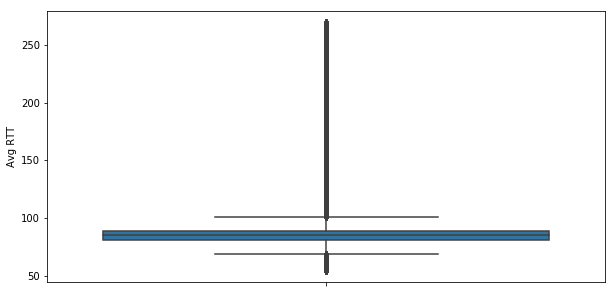

In [46]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data=numerical_data,y='Avg RTT')
plt.show()

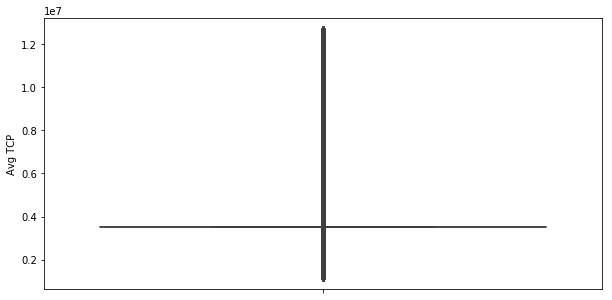

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data=numerical_data,y='Avg TCP')
plt.show()

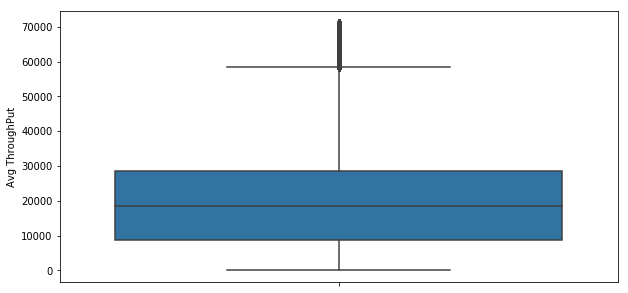

In [47]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data=numerical_data,y='Avg ThroughPut')
plt.show()

In [31]:
#df = data2[['Avg RTT','Avg TCP','Avg ThroughPut']]

### Aggregate per customer


In [49]:
da = data.groupby(['MSISDN/Number']).agg({'Avg RTT':'sum','Handset Type':'count','Avg TCP':'sum','Avg ThroughPut':'sum'}).reset_index()

In [50]:
#a1 = da[['MSISDNnlargestber','Avg RTT']].sort_values(by = 'Avg RTT', ascending = False)

In [52]:
data['Avg RTT'].nlargest(10).reset_index()

,index,Avg RTT
0,30155,96924.0
1,29916,64641.0
2,5963,54848.0
3,22839,27278.0
4,23442,26300.0
5,1361,25922.0
6,81256,25715.0
7,97312,25388.0
8,100575,24738.0
9,97905,20980.0


In [96]:
#a2 = da[['MSISDN/Number','Avg TCP']].sort_values(by = 'Avg TCP', ascending = False)

In [53]:
data['Avg TCP'].nlargest(10).reset_index()

,index,Avg TCP
0,34636,4.344116e+09
1,140797,4.301477e+09
2,77950,4.294432e+09
3,135677,4.291465e+09
4,3741,4.288121e+09
5,119667,4.275492e+09
6,39608,4.268647e+09
7,59011,4.261616e+09
8,76971,4.260174e+09
9,41182,4.254660e+09


In [97]:
#a3 = da[['MSISDN/Number','Avg ThroughPut']].sort_values(by = 'Avg ThroughPut', ascending = False)

In [54]:
data['Avg ThroughPut'].nlargest(10).reset_index()

,index,Avg ThroughPut
0,120876,382262.0
1,143670,313244.0
2,141250,304299.0
3,91298,300546.0
4,116794,283931.0
5,141449,281144.0
6,149616,277152.0
7,92177,276205.0
8,116550,274052.0
9,117776,269888.0


#### BOTTOM

In [98]:
#b1 = da[['MSISDN/Number','Avg RTT']].sort_values(by = 'Avg RTT')

In [55]:
data['Avg RTT'].nsmallest(10).reset_index()

,index,Avg RTT
0,42602,0.0
1,103321,0.0
2,124538,0.0
3,143878,0.0
4,71738,2.0
5,50966,4.0
6,144923,4.0
7,103544,5.0
8,8756,6.0
9,123210,6.0


In [99]:
#b2 = da[['MSISDN/Number','Avg TCP']].sort_values(by = 'Avg TCP')

In [56]:
data['Avg TCP'].nsmallest(10).reset_index()

,index,Avg TCP
0,143594,86.0
1,111100,97.0
2,18417,106.0
3,13142,108.0
4,97061,113.0
5,8794,128.0
6,99947,129.0
7,83214,134.0
8,95955,134.0
9,12849,143.0


In [100]:
#b3 = da[['MSISDN/Number','Avg ThroughPut']].sort_values(by = 'Avg ThroughPut')

In [57]:
data['Avg ThroughPut'].nsmallest(10).reset_index()

,index,Avg ThroughPut
0,148,0.0
1,614,0.0
2,2460,0.0
3,3893,0.0
4,4129,0.0
5,4822,0.0
6,5796,0.0
7,5961,0.0
8,6135,0.0
9,7186,0.0


### Frequency

In [58]:
data['Avg RTT'].value_counts().reset_index(name = 'count')[:10]

,index,count
0,54.0,28852
1,29.0,4990
2,39.0,4210
3,38.0,2755
4,40.0,2639
5,30.0,2591
6,28.0,2424
7,49.0,2205
8,41.0,1964
9,31.0,1956


In [59]:
data['Avg TCP'].value_counts().reset_index(name = 'count')[:10]

,index,count
0,1199819.5,99015
1,2660.0,28
2,5320.0,22
3,6650.0,20
4,3990.0,19
5,7980.0,14
6,1873.0,12
7,2648.0,9
8,15960.0,9
9,11970.0,8


In [60]:
data['Avg ThroughPut'].value_counts().reset_index(name = 'count')[:10]

,index,count
0,63.0,3886
1,15.0,3681
2,97.0,1945
3,90.0,1882
4,98.0,1800
5,96.0,1670
6,99.0,1570
7,89.0,1556
8,91.0,1513
9,93.0,1490


#### Distribution of Average ThroughPut per Handset Type

In [86]:
a = data['Handset Type'].value_counts().reset_index()[:25].loc[:,'index'].to_list()

In [87]:
a = data.loc[data['Handset Type'].isin(a),:]

In [95]:
tp_dist = a.groupby('Handset Type')['Avg ThroughPut'].sum().apply(np.log)

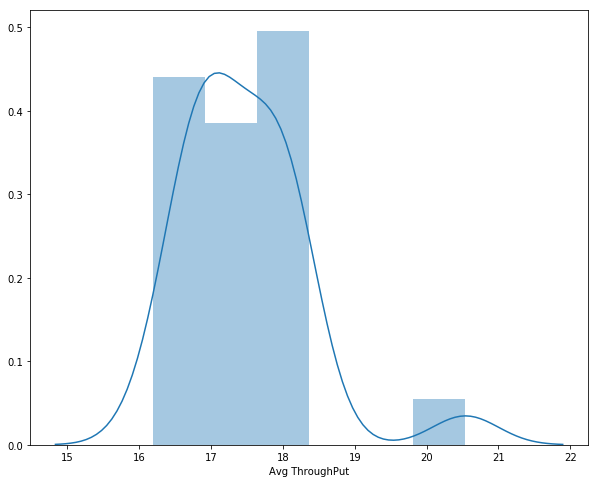

In [123]:
plt.figure(figsize=(10,8))
sns.distplot(tp_dist)
plt.savefig('fig/dist2.png')
plt.show()

#### Average Retransmission View per HandSet Type

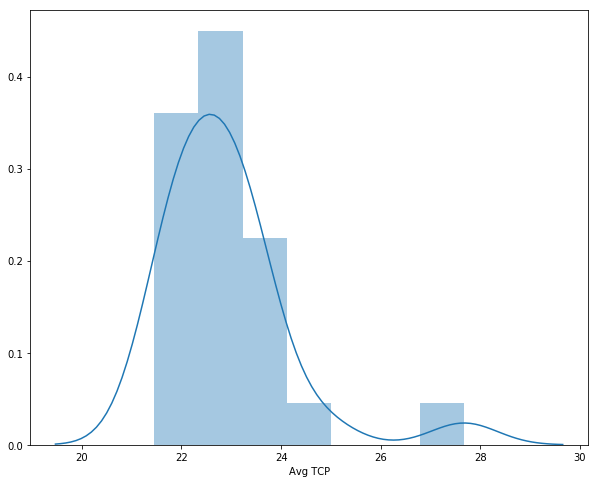

In [122]:
tp_dist_retrans = a.groupby('Handset Type')['Avg TCP'].sum().apply(np.log)

plt.figure(figsize=(10,8))
sns.distplot(tp_dist_retrans)
plt.savefig('fig/dist1.png')
plt.show()

### KMeans 

In [118]:
km_data = da.drop('MSISDN/Number', axis= 1)

In [119]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(km_data)
kmean = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km_cluster = kmean.fit_predict(data_scaled)

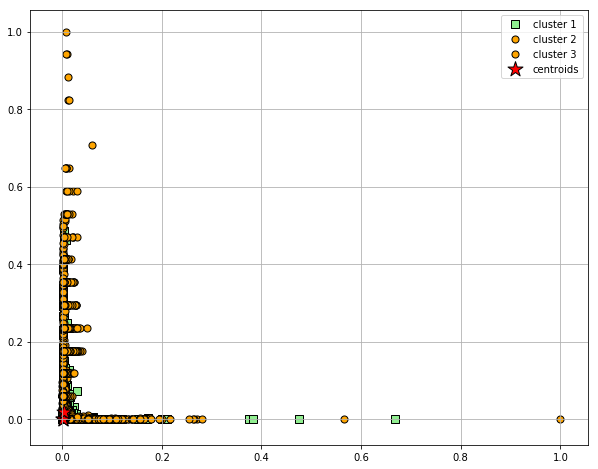

In [121]:
# plot the 3 clusters
plt.figure(figsize = (10,8))

plt.scatter(
    data_scaled[km_cluster == 0, 0], data_scaled[km_cluster == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data_scaled[km_cluster == 1, 0], data_scaled[km_cluster == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data_scaled[km_cluster == 2, 0], data_scaled[km_cluster == 2, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()